<a href="https://colab.research.google.com/github/El-awwal/demo/blob/main/StageE_hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [2]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [4]:
#data[ 'FullDate' ] = pd.to_datetime(data[ 'FullDate'])

In [5]:
#data['FullDate']

In [6]:

# #convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime

data['FullDate'] = pd.to_datetime(data.FullDate)
data.set_index('FullDate', inplace = True)

In [7]:
data.dtypes

Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [8]:
#Convert object types to float
data.Tmax = data.Tmax.astype(float)
data.SysLoad = data.SysLoad.astype(float)
data.GasPrice = data.GasPrice.astype(float)
data.ElecPrice = data.ElecPrice.astype(float)

In [9]:
data.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

Text(0.5, 1.0, 'Upsampled Data Daily')

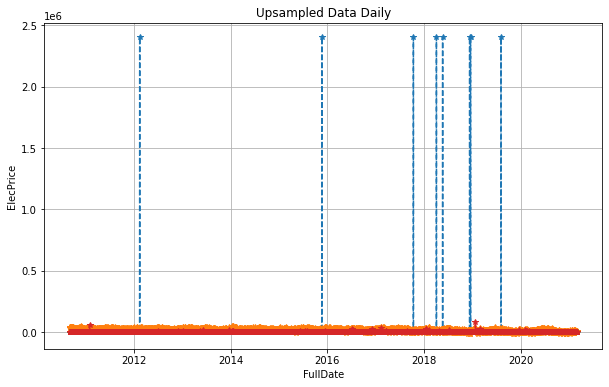

In [10]:
#Resample to daily data points
data_daily = data.resample('D').sum()

plt.figure(figsize=(10,6))
plt.plot(data_daily, '--', marker='*')
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')
plt.title('Upsampled Data Daily')

Time Series Exploratory Methods

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


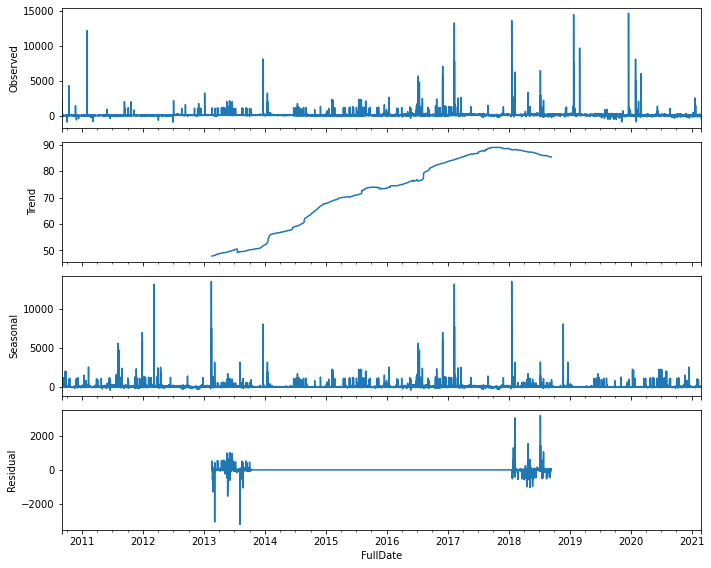

In [11]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
decompose_series = sm.tsa.seasonal_decompose(data['ElecPrice'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. 
Alternate Hypothesis (H1): The null hypothesis is 
rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis
(H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [12]:
#ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_daily['ElecPrice'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


The ADF statistic is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

In [13]:
from fbprophet import Prophet

In [15]:
data_daily_copy = data_daily.reset_index()
data_daily_copy.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [16]:
#Create a subset of FullDate and ElecPrice
data_daily_copy = data_daily_copy[['FullDate','ElecPrice']]
data_daily_copy.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [17]:
data_daily_copy = data_daily_copy.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})

In [18]:
data_daily_copy.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [19]:
X = data_daily_copy
y  = data_daily_copy

In [20]:
x = int(len(X))
X_train, X_test = X[:2757], X[2757:]
y_train, y_test = y[:2757], y[2757:] 

In [21]:
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
my_prediction = model.make_future_dataframe(periods=10, freq='D') 
forecast = model.predict(my_prediction) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1380.457396,3540.572361,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1132.310219,3470.632677,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1407.313695,3289.004987,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1984.172517,2968.463983,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2044.142682,2974.719286,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845
5,2010-09-06,851.525343,-1598.737156,3289.020698,851.525343,851.525343,30.835228,30.835228,30.835228,137.655349,137.655349,137.655349,-106.820121,-106.820121,-106.820121,0.0,0.0,0.0,882.360571
6,2010-09-07,851.474885,-1765.463874,2871.725385,851.474885,851.474885,-115.228484,-115.228484,-115.228484,9.749221,9.749221,9.749221,-124.977705,-124.977705,-124.977705,0.0,0.0,0.0,736.246401
7,2010-09-08,851.424427,-1453.030895,3176.260142,851.424427,851.424427,16.772717,16.772717,16.772717,159.308129,159.308129,159.308129,-142.535412,-142.535412,-142.535412,0.0,0.0,0.0,868.197144
8,2010-09-09,851.373970,-1351.872892,3437.930941,851.373970,851.373970,97.685677,97.685677,97.685677,257.036327,257.036327,257.036327,-159.350650,-159.350650,-159.350650,0.0,0.0,0.0,949.059647
9,2010-09-10,851.323512,-1615.439591,3167.869051,851.323512,851.323512,-125.068400,-125.068400,-125.068400,50.257478,50.257478,50.257478,-175.325877,-175.325877,-175.325877,0.0,0.0,0.0,726.255113


In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1380.457396,3540.572361,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1132.310219,3470.632677,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1407.313695,3289.004987,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1984.172517,2968.463983,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-2044.142682,2974.719286,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
2762,2018-03-25,2180.405115,-251.443246,4560.104493,2695.847232,2695.847232,2695.847232
2763,2018-03-26,2654.640068,340.631946,5028.575874,2696.663801,2696.663801,2696.663801
2764,2018-03-27,2519.735582,42.621279,4768.273245,2697.480370,2697.480370,2697.480370
2765,2018-03-28,2661.794389,189.025067,5035.953486,2698.296939,2698.296939,2698.296939


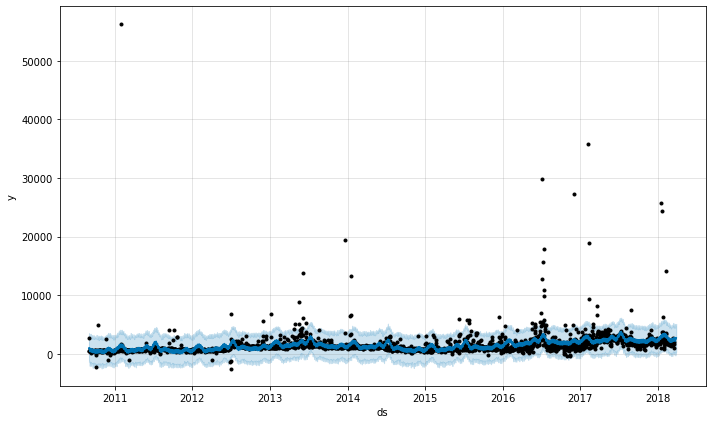

In [31]:
model.plot(forecast)
plt.show()

In [32]:

y_train

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [33]:

actual = y_train['y']
pred = forecast['yhat'][:2757]
actual, pred = np.array(actual), np.array(pred)
mape = np.mean(np.abs(actual-pred)/ actual) * 100

In [34]:
#calculate MAPE
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


actual  = y_train['y']
pred = forecast['yhat'][:2757]

mape(actual, pred)

59.56227791978223

In [35]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train['y']
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)


1862.9923179376394


MULTIVARIATE TIME SERIES FORECASTING

In [37]:
from fbprophet import Prophet
data_daily_new = data_daily.reset_index()
data_daily_new.head(2)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [39]:

data_daily_new = data_daily_new.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y', 'Tmax': 'add1', 'SysLoad': 'add2', 'GasPrice': 'add3'})
data_daily_new.head()

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [42]:
X1 = data_daily_new
y1 = data_daily_new.y
x1 = int(len(X1))
X1_train, X1_test = X1[:2757], X1[2757:]
y1_train, y1_test = y1[:2757], y1[2757:]

In [43]:

model_new = Prophet()
model_new.add_regressor('add1')
model_new.add_regressor('add2')
model_new.add_regressor('add3')
model_new.fit(data_daily_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
new_future_data = model_new.make_future_dataframe(periods=10, freq='D') 


In [45]:
new_future_data.head()

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [48]:

data_daily_new = data_daily_new.append(X1_test)
data_daily_new = data_daily_new.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'})
future_data = data_daily_new[['ds', 'add1', 'add2', 'add3']]
future_data.head()

,ds,add1,add2,add3
0,2010-09-01,379.2,41565.380,88.56
1,2010-09-02,369.6,38898.990,88.56
2,2010-09-03,439.2,41665.760,106.80
3,2010-09-04,328.8,35638.085,81.36
4,2010-09-05,357.6,35611.410,106.80


In [49]:
forecast_new = model_new.predict(future_data)
forecast_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-09-01,1499.311388,-1081.499123,4072.286052
1,2010-09-02,1610.046136,-922.887927,3961.241898
2,2010-09-03,1758.493320,-978.271880,4452.624299
3,2010-09-04,912.309999,-1747.989366,3640.889822
4,2010-09-05,1276.924439,-1293.012489,3769.777765
...,...,...,...,...
7060,2021-02-27,222.743316,-2369.163641,2866.347436
7061,2021-02-28,380.470553,-2176.600865,2930.093457
7062,2021-02-28,380.470553,-2210.753939,2959.088303
7063,2021-02-28,380.470553,-2278.994900,3045.881453


In [50]:
forecast_new

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,903.437387,-1081.499123,4072.286052,903.437387,903.437387,0.474482,0.474482,0.474482,1393.388140,...,-21.457852,-21.457852,-21.457852,7.892605,7.892605,7.892605,0.0,0.0,0.0,1499.311388
1,2010-09-02,903.947109,-922.887927,3961.241898,903.947109,903.947109,0.475362,0.475362,0.475362,1227.691650,...,262.954529,262.954529,262.954529,-0.599140,-0.599140,-0.599140,0.0,0.0,0.0,1610.046136
2,2010-09-03,904.456831,-978.271880,4452.624299,904.456831,904.456831,0.468988,0.468988,0.468988,1399.626017,...,-8.068856,-8.068856,-8.068856,-9.851798,-9.851798,-9.851798,0.0,0.0,0.0,1758.493320
3,2010-09-04,904.966553,-1747.989366,3640.889822,904.966553,904.966553,0.479098,0.479098,0.479098,1025.050433,...,-113.175400,-113.175400,-113.175400,-19.421977,-19.421977,-19.421977,0.0,0.0,0.0,912.309999
4,2010-09-05,905.476275,-1293.012489,3769.777765,905.476275,905.476275,0.476460,0.476460,0.476460,1023.392778,...,-95.411338,-95.411338,-95.411338,-28.871874,-28.871874,-28.871874,0.0,0.0,0.0,1276.924439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,2021-02-27,1701.781923,-2369.163641,2866.347436,1701.781923,1701.781923,0.457560,0.457560,0.457560,-883.051786,...,-113.175400,-113.175400,-113.175400,-282.232364,-282.232364,-282.232364,0.0,0.0,0.0,222.743316
7061,2021-02-28,1701.659916,-2176.600865,2930.093457,1701.659916,1701.659916,0.455802,0.455802,0.455802,-774.788466,...,-95.411338,-95.411338,-95.411338,-272.260456,-272.260456,-272.260456,0.0,0.0,0.0,380.470553
7062,2021-02-28,1701.659916,-2210.753939,2959.088303,1701.659916,1701.659916,0.455802,0.455802,0.455802,-774.788466,...,-95.411338,-95.411338,-95.411338,-272.260456,-272.260456,-272.260456,0.0,0.0,0.0,380.470553
7063,2021-02-28,1701.659916,-2278.994900,3045.881453,1701.659916,1701.659916,0.455802,0.455802,0.455802,-774.788466,...,-95.411338,-95.411338,-95.411338,-272.260456,-272.260456,-272.260456,0.0,0.0,0.0,380.470553


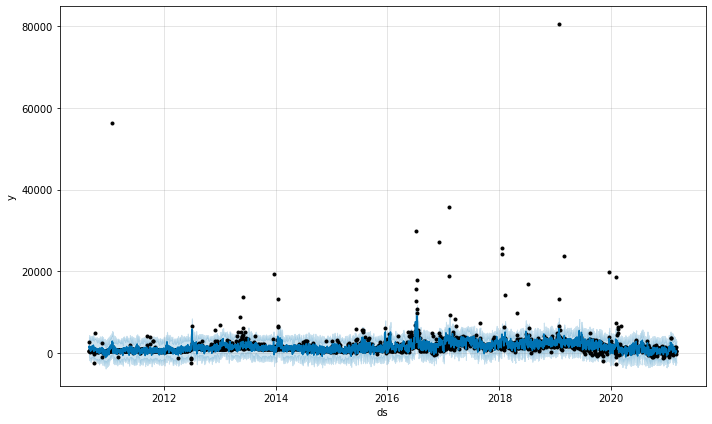

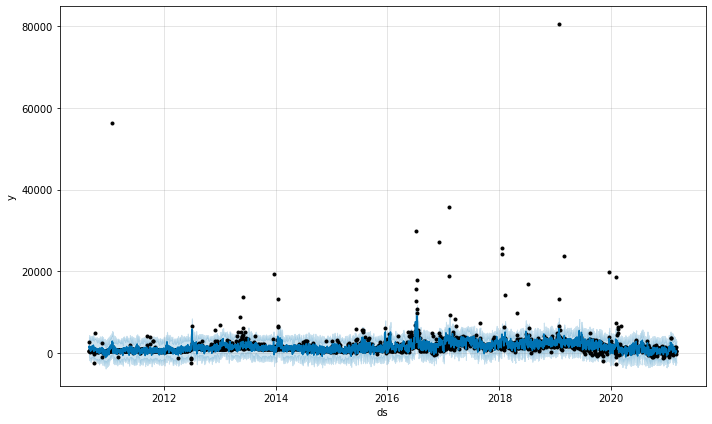

In [51]:
model_new.plot(forecast_new)